/home/zog/.local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


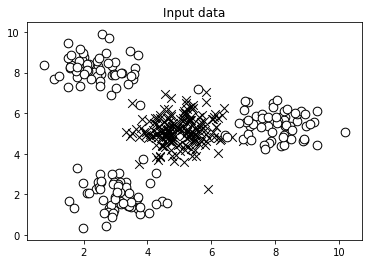

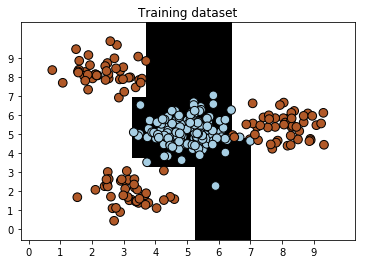

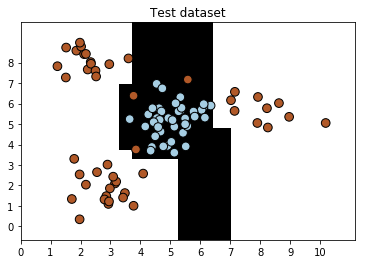


########################################

Classifier performance on training dataset

             precision    recall  f1-score   support

    Class-0       0.99      1.00      1.00       137
    Class-1       1.00      0.99      1.00       133

avg / total       1.00      1.00      1.00       270

########################################

########################################

Classifier performance on test dataset

             precision    recall  f1-score   support

    Class-0       0.93      1.00      0.97        43
    Class-1       1.00      0.94      0.97        47

avg / total       0.97      0.97      0.97        90

########################################



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import cross_validation
from sklearn.tree import DecisionTreeClassifier

from utilities import visualize_classifier

%matplotlib inline

# Load input data
input_file = 'data_decision_trees.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# Separate input data into two classes based on labels
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])

# Visualize input data
plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black', 
        edgecolors='black', linewidth=1, marker='x')
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white', 
        edgecolors='black', linewidth=1, marker='o')
plt.title('Input data')

# Split data into training and testing datasets 
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
        X, y, test_size=0.25, random_state=5)

# Decision Trees classifier 
params = {'random_state': 0, 'max_depth': 4}
classifier = DecisionTreeClassifier(**params)
classifier.fit(X_train, y_train)
visualize_classifier(classifier, X_train, y_train, 'Training dataset')

y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test, 'Test dataset')

# Evaluate classifier performance
class_names = ['Class-0', 'Class-1']
print("\n" + "#"*40)
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))
print("#"*40 + "\n")

print("#"*40)
print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, y_test_pred, target_names=class_names))
print("#"*40 + "\n")

plt.show()

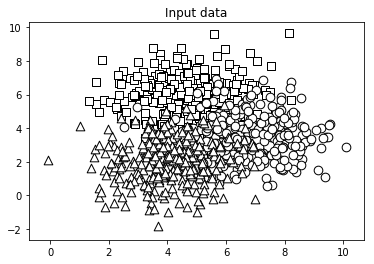

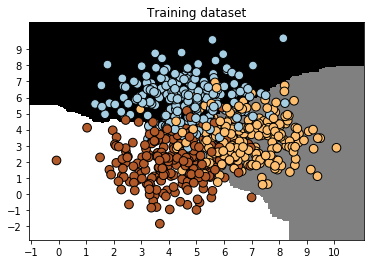

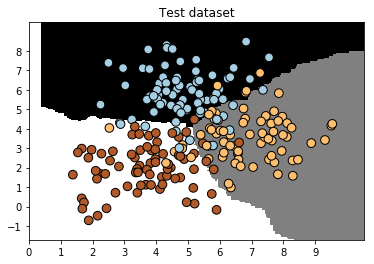


########################################

Classifier performance on training dataset

             precision    recall  f1-score   support

    Class-0       0.89      0.83      0.86       221
    Class-1       0.82      0.84      0.83       230
    Class-2       0.83      0.86      0.85       224

avg / total       0.85      0.85      0.85       675

########################################

########################################

Classifier performance on test dataset

             precision    recall  f1-score   support

    Class-0       0.92      0.85      0.88        79
    Class-1       0.84      0.84      0.84        70
    Class-2       0.85      0.92      0.89        76

avg / total       0.87      0.87      0.87       225

########################################


Confidence measure:

Datapoint: [5 5]
Probabilities: [0.48904419 0.28020114 0.23075467]
Predicted class: Class-0

Datapoint: [3 6]
Probabilities: [0.66707383 0.12424406 0.20868211]
Predicted class: Class-0

Dat

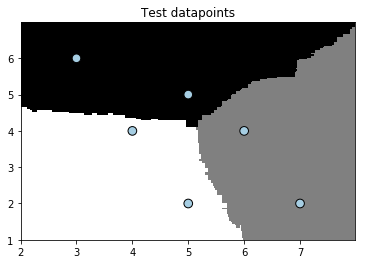

In [3]:
import argparse 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from utilities import visualize_classifier

import easydict

# Argument parser 
def build_arg_parser():
    parser = argparse.ArgumentParser(description='Classify data using \
            Ensemble Learning techniques')
    parser.add_argument('--classifier-type', dest='classifier_type', 
            required=True, choices=['rf', 'erf'], help="Type of classifier \
                    to use; can be either 'rf' or 'erf'")
    return parser

if __name__=='__main__':
    # Parse the input arguments
    #args = build_arg_parser().parse_args()
    args = easydict.EasyDict({
    #    'classifier_type': 'rf'
        'classifier_type': 'erf'
    })
    classifier_type = args.classifier_type

    # Load input data
    input_file = 'data_random_forests.txt'
    data = np.loadtxt(input_file, delimiter=',')
    X, y = data[:, :-1], data[:, -1]

    # Separate input data into three classes based on labels
    class_0 = np.array(X[y==0])
    class_1 = np.array(X[y==1])
    class_2 = np.array(X[y==2])

    # Visualize input data
    plt.figure()
    plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='white', 
                    edgecolors='black', linewidth=1, marker='s')
    plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white', 
                    edgecolors='black', linewidth=1, marker='o')
    plt.scatter(class_2[:, 0], class_2[:, 1], s=75, facecolors='white', 
                    edgecolors='black', linewidth=1, marker='^')
    plt.title('Input data')

    # Split data into training and testing datasets 
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(
            X, y, test_size=0.25, random_state=5)

    # Ensemble Learning classifier
    params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0}
    if classifier_type == 'rf':
        classifier = RandomForestClassifier(**params)
    else:
        classifier = ExtraTreesClassifier(**params)

    classifier.fit(X_train, y_train)
    visualize_classifier(classifier, X_train, y_train, 'Training dataset')

    y_test_pred = classifier.predict(X_test)
    visualize_classifier(classifier, X_test, y_test, 'Test dataset')

    # Evaluate classifier performance
    class_names = ['Class-0', 'Class-1', 'Class-2']
    print("\n" + "#"*40)
    print("\nClassifier performance on training dataset\n")
    print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))
    print("#"*40 + "\n")

    print("#"*40)
    print("\nClassifier performance on test dataset\n")
    print(classification_report(y_test, y_test_pred, target_names=class_names))
    print("#"*40 + "\n")

    # Compute confidence
    test_datapoints = np.array([[5, 5], [3, 6], [6, 4], [7, 2], [4, 4], [5, 2]])

    print("\nConfidence measure:")
    for datapoint in test_datapoints:
        probabilities = classifier.predict_proba([datapoint])[0]
        predicted_class = 'Class-' + str(np.argmax(probabilities))
        print('\nDatapoint:', datapoint)
        print('Probabilities:', probabilities)
        print('Predicted class:', predicted_class) 

    # Visualize the datapoints
    visualize_classifier(classifier, test_datapoints, [0]*len(test_datapoints), 
            'Test datapoints')

    plt.show()

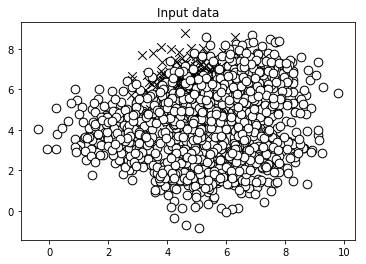

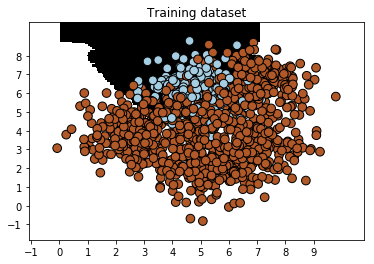

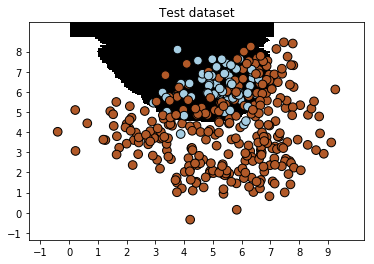


########################################

Classifier performance on training dataset

             precision    recall  f1-score   support

    Class-0       0.44      0.93      0.60       181
    Class-1       0.98      0.77      0.86       944

avg / total       0.89      0.80      0.82      1125

########################################

########################################

Classifier performance on test dataset

             precision    recall  f1-score   support

    Class-0       0.45      0.94      0.61        69
    Class-1       0.98      0.74      0.84       306

avg / total       0.88      0.78      0.80       375

########################################



In [5]:
import sys

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn import cross_validation
from sklearn.metrics import classification_report

from utilities import visualize_classifier

# Load input data
input_file = 'data_imbalance.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# Separate input data into two classes based on labels
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])

# Visualize input data
plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black', 
                edgecolors='black', linewidth=1, marker='x')
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white', 
                edgecolors='black', linewidth=1, marker='o')
plt.title('Input data')

# Split data into training and testing datasets 
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
        X, y, test_size=0.25, random_state=5)

# Extremely Random Forests classifier
#params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0}
params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0, 'class_weight': 'balanced'}
#if len(sys.argv) > 1:
#    if sys.argv[1] == 'balance':
#        params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0, 'class_weight': 'balanced'}
#    else:
#        raise TypeError("Invalid input argument; should be 'balance'")

classifier = ExtraTreesClassifier(**params)
classifier.fit(X_train, y_train)
visualize_classifier(classifier, X_train, y_train, 'Training dataset')

y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test, 'Test dataset')

# Evaluate classifier performance
class_names = ['Class-0', 'Class-1']
print("\n" + "#"*40)
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))
print("#"*40 + "\n")

print("#"*40)
print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, y_test_pred, target_names=class_names))
print("#"*40 + "\n")

plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import cross_validation, grid_search
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import cross_validation
from sklearn.metrics import classification_report

from utilities import visualize_classifier

# Load input data
input_file = 'data_random_forests.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# Separate input data into three classes based on labels
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])
class_2 = np.array(X[y==2])

# Split the data into training and testing datasets 
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
        X, y, test_size=0.25, random_state=5)

# Define the parameter grid 
parameter_grid = [ {'n_estimators': [100], 'max_depth': [2, 4, 7, 12, 16]},
                   {'max_depth': [4], 'n_estimators': [25, 50, 100, 250]}
                 ]

metrics = ['precision_weighted', 'recall_weighted']

for metric in metrics:
    print("\n##### Searching optimal parameters for", metric)

    classifier = grid_search.GridSearchCV(
            ExtraTreesClassifier(random_state=0), 
            parameter_grid, cv=5, scoring=metric)
    classifier.fit(X_train, y_train)

    print("\nGrid scores for the parameter grid:")
    for params, avg_score, _ in classifier.grid_scores_:
        print(params, '-->', round(avg_score, 3))

    print("\nBest parameters:", classifier.best_params_)

    y_pred = classifier.predict(X_test)
    print("\nPerformance report:\n")
    print(classification_report(y_test, y_pred))

/home/zog/.local/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)



##### Searching optimal parameters for precision_weighted

Grid scores for the parameter grid:
{'max_depth': 2, 'n_estimators': 100} --> 0.847
{'max_depth': 4, 'n_estimators': 100} --> 0.841
{'max_depth': 7, 'n_estimators': 100} --> 0.844
{'max_depth': 12, 'n_estimators': 100} --> 0.836
{'max_depth': 16, 'n_estimators': 100} --> 0.818
{'max_depth': 4, 'n_estimators': 25} --> 0.846
{'max_depth': 4, 'n_estimators': 50} --> 0.84
{'max_depth': 4, 'n_estimators': 100} --> 0.841
{'max_depth': 4, 'n_estimators': 250} --> 0.845

Best parameters: {'max_depth': 2, 'n_estimators': 100}

Performance report:

             precision    recall  f1-score   support

        0.0       0.94      0.81      0.87        79
        1.0       0.81      0.86      0.83        70
        2.0       0.83      0.91      0.87        76

avg / total       0.86      0.86      0.86       225


##### Searching optimal parameters for recall_weighted

Grid scores for the parameter grid:
{'max_depth': 2, 'n_estimators': 1


ADABOOST REGRESSOR
Mean squared error = 22.3
Explained variance score = 0.8


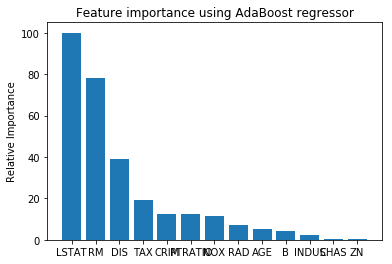

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn import cross_validation
from sklearn.utils import shuffle

#from utilities import visualize_feature_importances

# Load housing data
housing_data = datasets.load_boston() 

# Shuffle the data
X, y = shuffle(housing_data.data, housing_data.target, random_state=7)

# Split data into training and testing datasets 
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
        X, y, test_size=0.2, random_state=7)

# AdaBoost Regressor model
regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), 
        n_estimators=400, random_state=7)
regressor.fit(X_train, y_train)

# Evaluate performance of AdaBoost regressor
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred )
print("\nADABOOST REGRESSOR")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))

# Extract feature importances
feature_importances = regressor.feature_importances_
feature_names = housing_data.feature_names

# Normalize the importance values 
feature_importances = 100.0 * (feature_importances / max(feature_importances))

# Sort the values and flip them
index_sorted = np.flipud(np.argsort(feature_importances))

# Arrange the X ticks
pos = np.arange(index_sorted.shape[0]) + 0.5

# Plot the bar graph
plt.figure()
plt.bar(pos, feature_importances[index_sorted], align='center')
plt.xticks(pos, feature_names[index_sorted])
plt.ylabel('Relative Importance')
plt.title('Feature importance using AdaBoost regressor')
plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, mean_absolute_error
from sklearn import cross_validation, preprocessing
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import classification_report

# Load input data
input_file = 'traffic_data.txt'
data = []
with open(input_file, 'r') as f:
    for line in f.readlines():
        items = line[:-1].split(',')
        data.append(items)

data = np.array(data)

# Convert string data to numerical data
label_encoder = [] 
X_encoded = np.empty(data.shape)
for i, item in enumerate(data[0]):
    if item.isdigit():
        X_encoded[:, i] = data[:, i]
    else:
        label_encoder.append(preprocessing.LabelEncoder())
        X_encoded[:, i] = label_encoder[-1].fit_transform(data[:, i])

X = X_encoded[:, :-1].astype(int)
y = X_encoded[:, -1].astype(int)

# Split data into training and testing datasets 
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
        X, y, test_size=0.25, random_state=5)

# Extremely Random Forests regressor
params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0}
regressor = ExtraTreesRegressor(**params)
regressor.fit(X_train, y_train)

# Compute the regressor performance on test data
y_pred = regressor.predict(X_test)
print("Mean absolute error:", round(mean_absolute_error(y_test, y_pred), 2))

# Testing encoding on single data instance
test_datapoint = ['Saturday', '10:20', 'Atlanta', 'no']
test_datapoint_encoded = [-1] * len(test_datapoint)
count = 0
for i, item in enumerate(test_datapoint):
    if item.isdigit():
        test_datapoint_encoded[i] = int(test_datapoint[i])
    else:
        test_datapoint_encoded[i] = int(label_encoder[count].transform([test_datapoint[i]]))
        count = count + 1 

test_datapoint_encoded = np.array(test_datapoint_encoded)

# Predict the output for the test datapoint
print("Predicted traffic:", int(regressor.predict([test_datapoint_encoded])[0]))

Mean absolute error: 7.42
Predicted traffic: 26
